In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA 
TempData = pd.read_csv('TSLA Training.csv')

In [2]:
TempData.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-06-22,23.436001,23.483334,22.133333,22.242001,22.242001,153991500
1,2018-06-25,22.007999,22.564667,21.833332,22.200666,22.200666,103969500
2,2018-06-26,22.403334,22.903334,21.719999,22.799999,22.799999,111787500
3,2018-06-27,23.000000,23.386000,22.633333,22.966667,22.966667,125005500
4,2018-06-28,23.243999,23.801332,23.073999,23.328667,23.328667,125970000


In [3]:
TSLA = TempData.dropna()
TSLA.index = pd.to_datetime(TSLA.Date)

In [4]:
TSLA.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03
mean,147.096224,150.516810,143.380293,147.045863,147.045863,1.364913e+08
std,113.549083,116.105483,110.658665,113.397564,113.397564,8.912683e+07
min,12.073333,12.445333,11.799333,11.931333,11.931333,2.940180e+07
25%,22.677334,23.140667,22.246000,22.635332,22.635332,7.870950e+07
50%,152.639999,155.300003,146.703339,149.919998,149.919998,1.087617e+08
75%,237.283340,241.800003,233.133331,237.036667,237.036667,1.650015e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


In [5]:
TSLA = TSLA["Close"] ['2018-06-22':'2023-06-21'] 

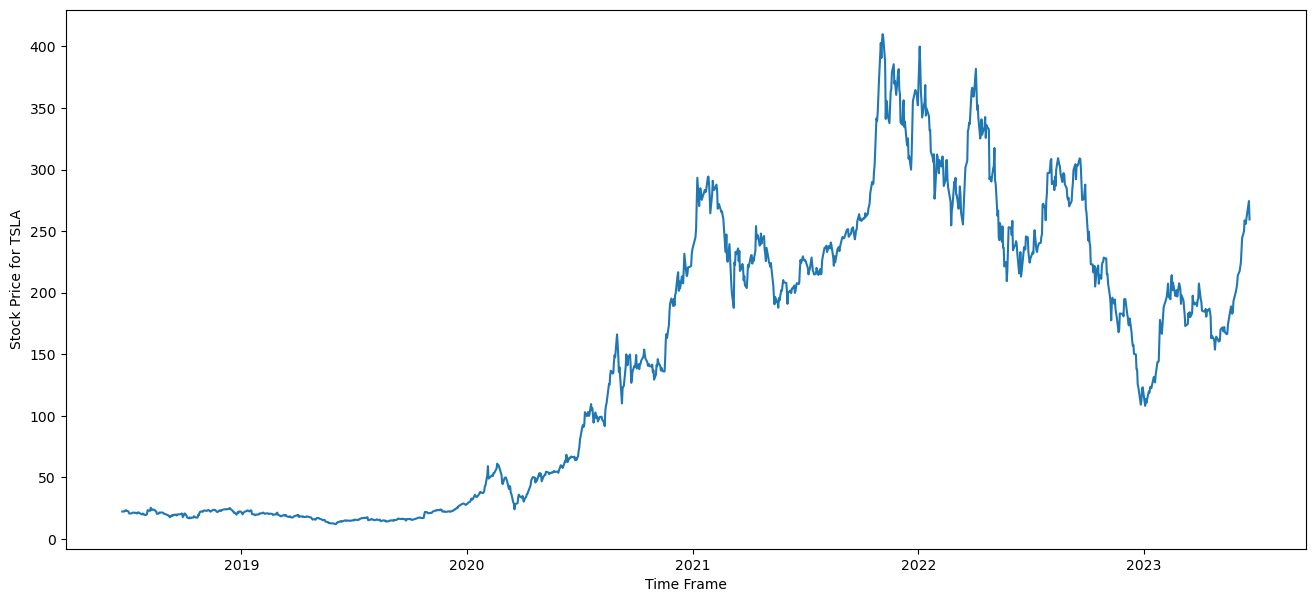

In [6]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Time Frame')
ax1.set_ylabel('Stock Price for TSLA')
ax1.plot(TSLA)

In [7]:
TSLA.describe()

count    1257.000000
mean      147.045863
std       113.397564
min        11.931333
25%        22.635332
50%       149.919998
75%       237.036667
max       409.970001
Name: Close, dtype: float64

In [8]:
#Checking Stationary
# Method1 = Rolling Statistics ( Moving Average )
# Method 2 = Duckey Fuller

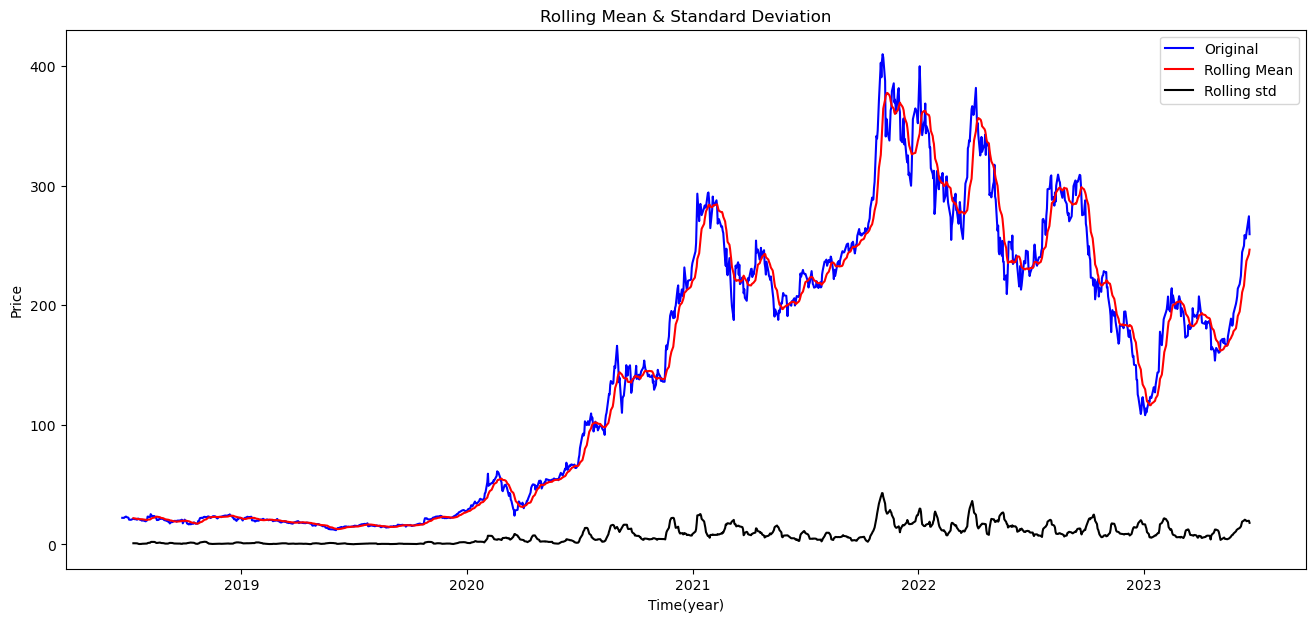

In [9]:
#Determining Rolling Statistics
rolLmean = TSLA.rolling(12).mean()
rolLstd = TSLA.rolling(12).std()

plt.figure(figsize=(16,7))
fig = plt.figure(1)

orig = plt.plot(TSLA, color='blue',label='Original')
mean = plt.plot(rolLmean, color='red',label='Rolling Mean')
std = plt.plot(rolLstd, color='black',label='Rolling std')
plt.legend(loc='best')
plt.xlabel('Time(year)')
plt.ylabel('Price')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

In [10]:
#Trying making it stationary

In [11]:
#Lets try transformation
import numpy as np
ts_log = np.log(TSLA)

In [12]:
# if p > 0.05 reject null hypothetis ( not stationary )
from statsmodels.tsa.stattools import adfuller
result = adfuller(ts_log.dropna())

print(f' ADF statistics : {result[0]}')
print(f' p value : {result[1]}')

 ADF statistics : -0.8639875996054279
 p value : 0.7996004358363904


In [13]:
TSLA.sort_index(inplace=True)

In [14]:
from statsmodels.tsa.stattools import acf,pacf
lag_acf = acf(ts_log, nlags=20)
lag_pacf = pacf(ts_log, nlags=20)

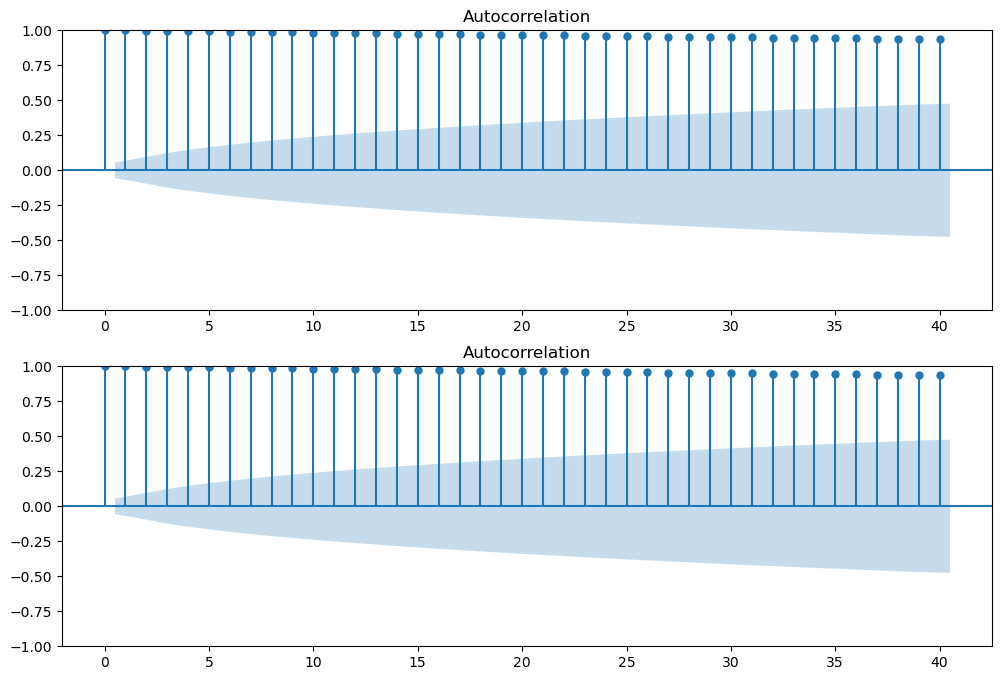

In [15]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_log.dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_acf(ts_log.dropna(),lags=40,ax=ax2)

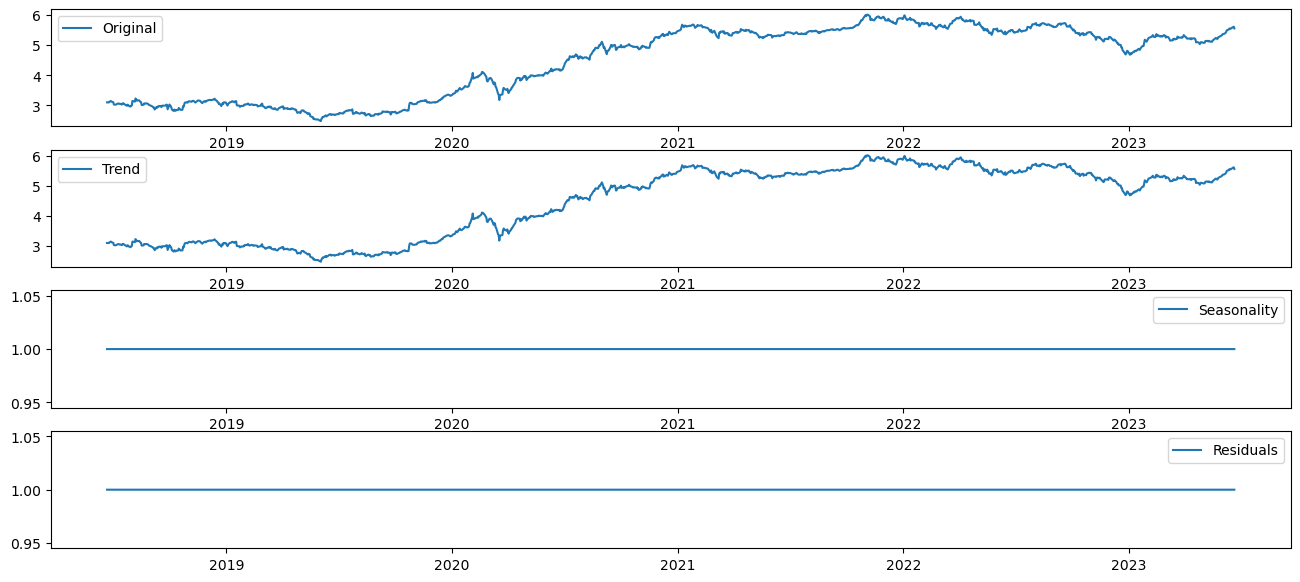

In [16]:
#Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log,period=1,model= 'multiplicative')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(16,7))
fig = plt.figure(1)

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residuals')
plt.legend(loc='best')

Date
2018-06-25         NaN
2018-06-26         NaN
2018-06-27         NaN
2018-06-28         NaN
2018-06-29         NaN
                ...   
2023-06-14    0.023724
2023-06-15    0.020057
2023-06-16    0.020415
2023-06-20    0.023295
2023-06-21    0.016064
Name: Close, Length: 1256, dtype: float64
Date
2018-06-25         NaN
2018-06-26         NaN
2018-06-27         NaN
2018-06-28         NaN
2018-06-29         NaN
                ...   
2023-06-14    0.014926
2023-06-15    0.015801
2023-06-16    0.015692
2023-06-20    0.018087
2023-06-21    0.028970
Name: Close, Length: 1256, dtype: float64


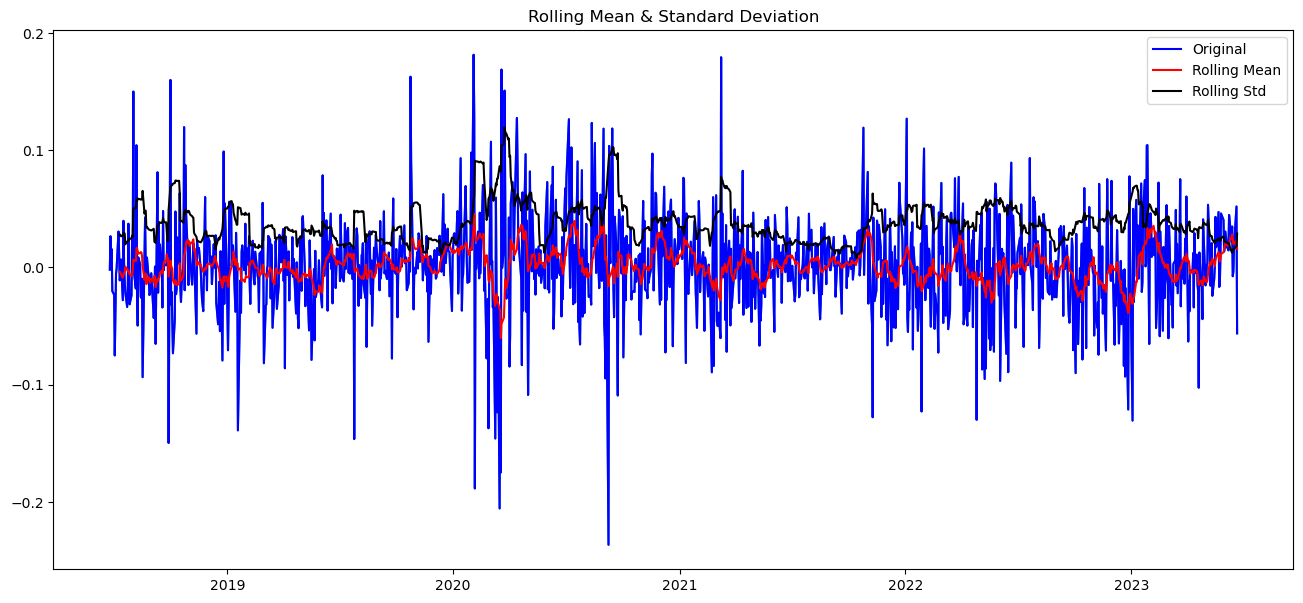

In [17]:
#Lets try differencing
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ts_log_diff = ts_log - ts_log.shift()
ts_log_diff = ts_log_diff.dropna()
plt.plot(ts_log_diff)

#Determining Rolling Statistics
rolLmean = ts_log_diff.rolling(12).mean()
rolLstd = ts_log_diff.rolling(12).std()

print(rolLmean)
print(rolLstd)

orig = plt.plot(ts_log_diff, color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False) 

In [18]:
result = adfuller(ts_log_diff.dropna())

print(f' ADF statistics : {result[0]}')
print(f' p value : {result[1]}')

 ADF statistics : -24.230141497164755
 p value : 0.0


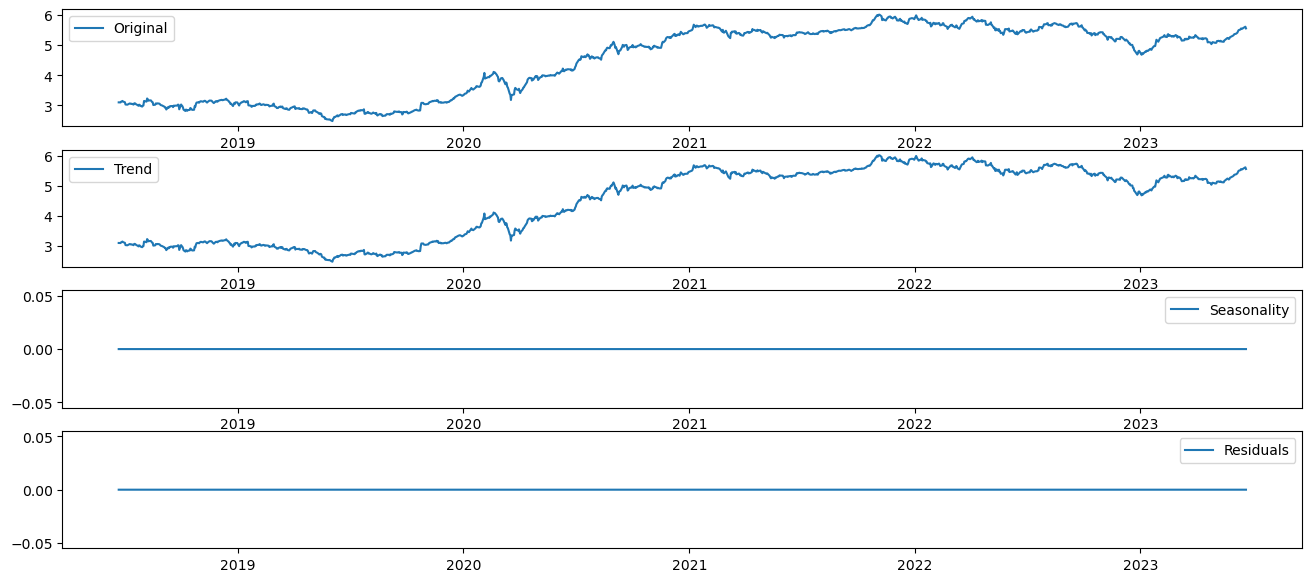

In [19]:
decomposition = seasonal_decompose(ts_log,period=1,model= 'additive')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(16,7))
fig = plt.figure(1)

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residuals')
plt.legend(loc='best')

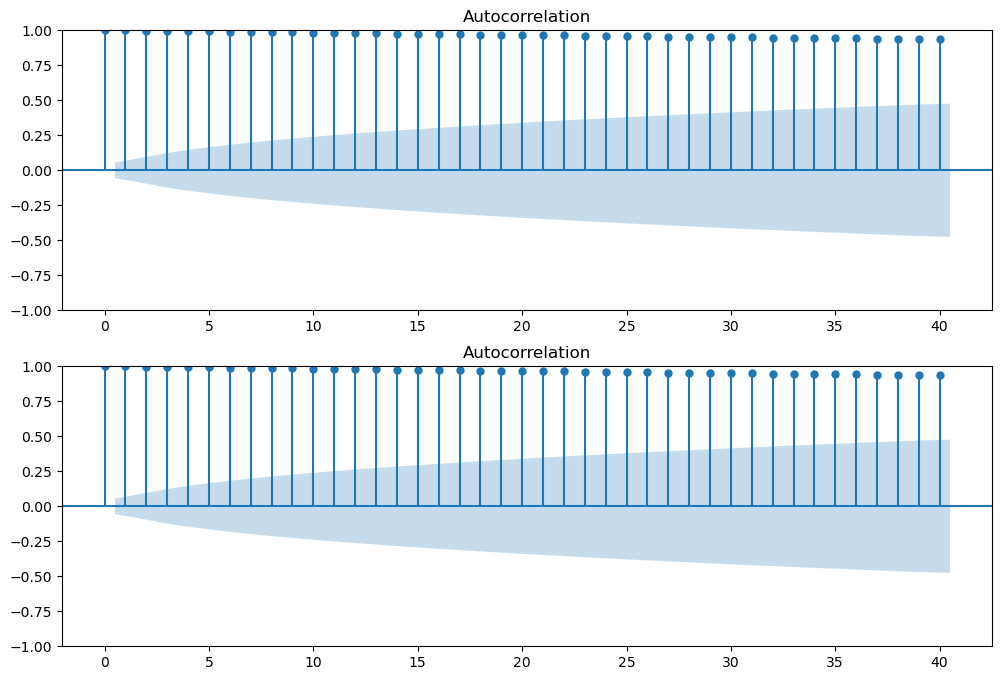

In [20]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20)
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_log.dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_acf(ts_log.dropna(),lags=40,ax=ax2)

C:\Users\ghosh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ghosh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ghosh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


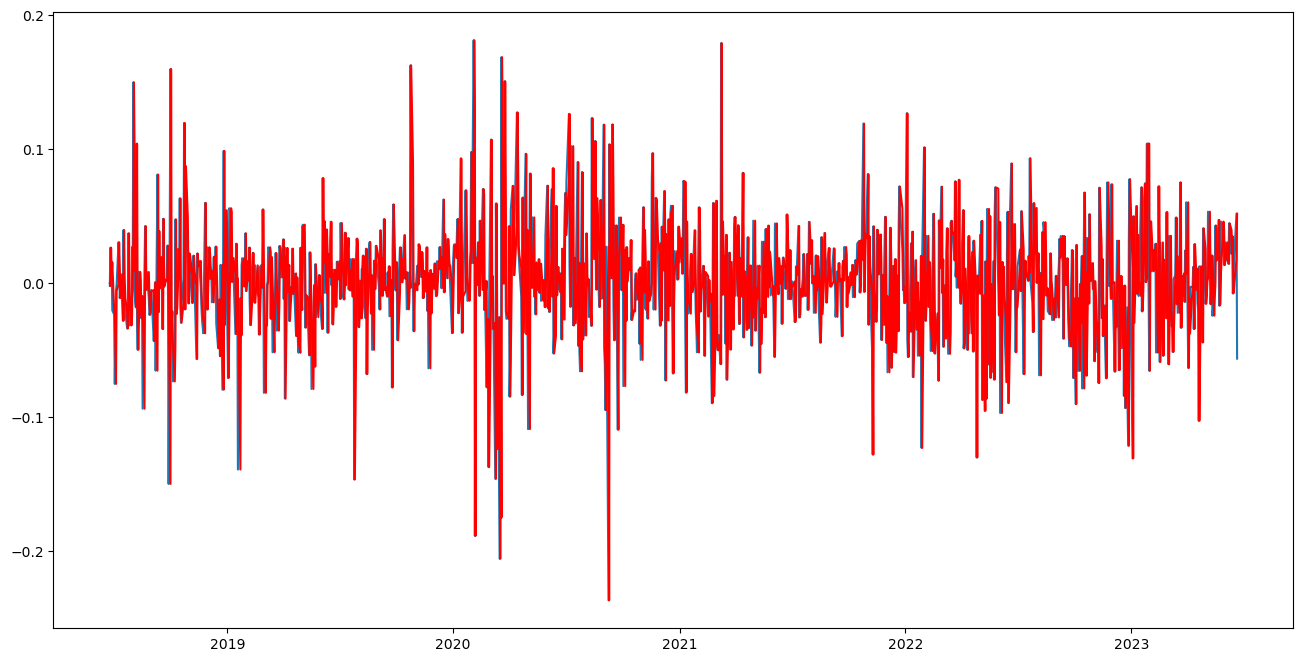

In [21]:
plt.figure(figsize=(16,8))
#ts_log_diff.dropna(inplace=True)
model = sm.tsa.ARIMA(ts_log_diff, order=(0,1,0))
results_ARIMA = model.fit()
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')

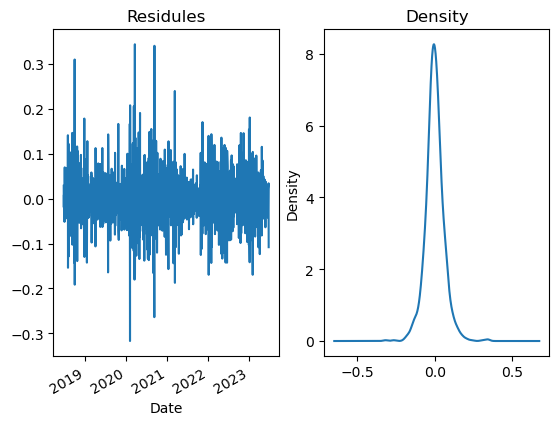

In [22]:
import matplotlib.pyplot as plt
residules = results_ARIMA.resid[1:]
fig, ax = plt.subplots(1,2)
residules.plot(title='Residules', ax=ax[0])
residules.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

In [23]:
ARIMA_diff_predictions = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(ARIMA_diff_predictions.head())

Date
2018-06-25    0.000000
2018-06-26   -0.001860
2018-06-27    0.026638
2018-06-28    0.007283
2018-06-29    0.015639
dtype: float64


In [24]:
ARIMA_diff_predictions_cumsum = ARIMA_diff_predictions.cumsum()
print(ARIMA_diff_predictions_cumsum.head())

Date
2018-06-25    0.000000
2018-06-26   -0.001860
2018-06-27    0.024778
2018-06-28    0.032061
2018-06-29    0.047701
dtype: float64


In [25]:
ARIMA_log_prediction = pd.Series(ts_log.iloc[0], index=ts_log.index)
ARIMA_log_prediction = ARIMA_log_prediction.add(ARIMA_diff_predictions_cumsum,fill_value=0)
ARIMA_log_prediction.head()

Date
2018-06-22    3.101982
2018-06-25    3.101982
2018-06-26    3.100122
2018-06-27    3.126760
2018-06-28    3.134044
dtype: float64

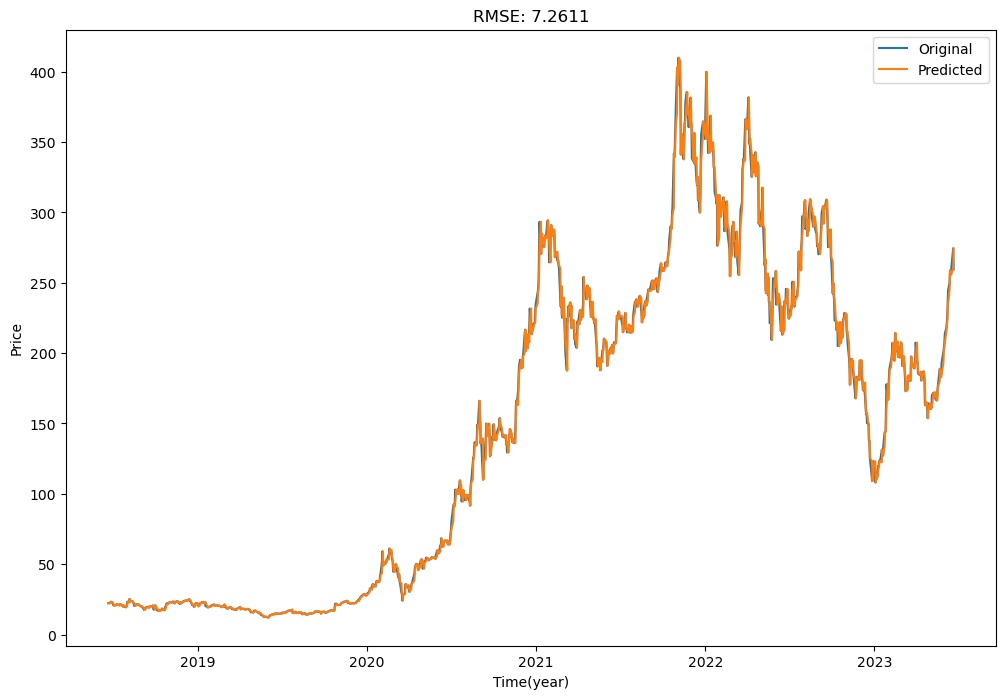

In [26]:
plt.figure(figsize=(12,8))
predictions_ARIMA = np.exp(ARIMA_log_prediction)
plt.plot(TSLA, label='Original')
plt.plot(predictions_ARIMA, label='Predicted')
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-TSLA)**2)/len(TSLA)))
plt.xlabel('Time(year)')
plt.ylabel('Price')
plt.legend(loc='best')

In [27]:
TSLA.mean()

147.04586313683373

In [28]:
import pmdarima as pm
fited = pm.auto_arima(ts_log, trace=True, supress_warning=True)
fited.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-4408.071, Time=4.62 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-4406.027, Time=0.36 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-4404.770, Time=0.73 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-4404.710, Time=1.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-4405.282, Time=0.23 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-4404.559, Time=2.55 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-4404.828, Time=1.07 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-4400.903, Time=3.13 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-4402.812, Time=4.58 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-4403.585, Time=1.84 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-4402.919, Time=3.91 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-4402.549, Time=2.68 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-4402.062, Time=6.10 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-4408.143, Time=2.15 sec
 ARIMA(1,1,2)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1257
Model:               SARIMAX(2, 1, 2)   Log Likelihood                2209.072
Date:                Fri, 05 Jul 2024   AIC                          -4408.143
Time:                        21:48:32   BIC                          -4382.465
Sample:                             0   HQIC                         -4398.492
                               - 1257                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6380      0.068      9.414      0.000       0.505       0.771
ar.L2         -0.8550      0.064    -13.459      0.000      -0.979      -0.730
ma.L1         -0.6646      0.057    -11.748      0.000      -0.775      -0.554
ma.L2          0.9013      0.054     16.759      0.000       0.796       1.007
sigma2         0.0017   4.38e-05     39.502      0.000       0.002       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               589.86
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.16   Skew:                            -0.15
Prob(H) (two-sided):                  0.13   Kurtosis:                         6.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
import numpy as np
from sklearn.metrics import mean_squared_error

#Data Cleaning
TSLA_test = TempData.dropna()
TSLA_test["Date"] = pd.to_datetime(TSLA_test["Date"])
TSLA_test.set_index("Date", inplace=True)
TSLA_test = TSLA_test["Close"]['2018-06-22':'2023-06-21']

#Fit ARIMA models
model = sm.tsa.ARIMA(TSLA_test, order=(0, 1, 0))
model2 = sm.tsa.ARIMA(TSLA_test, order=(0, 1, 2))
results_ARIMA = model.fit()
results_ARIMA2 = model2.fit()

#Calculate RMSE
rmse_arima1 = np.sqrt(mean_squared_error(TSLA_test, results_ARIMA.fittedvalues))
rmse_arima2 = np.sqrt(mean_squared_error(TSLA_test, results_ARIMA2.fittedvalues))

C:\Users\ghosh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ghosh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ghosh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ghosh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

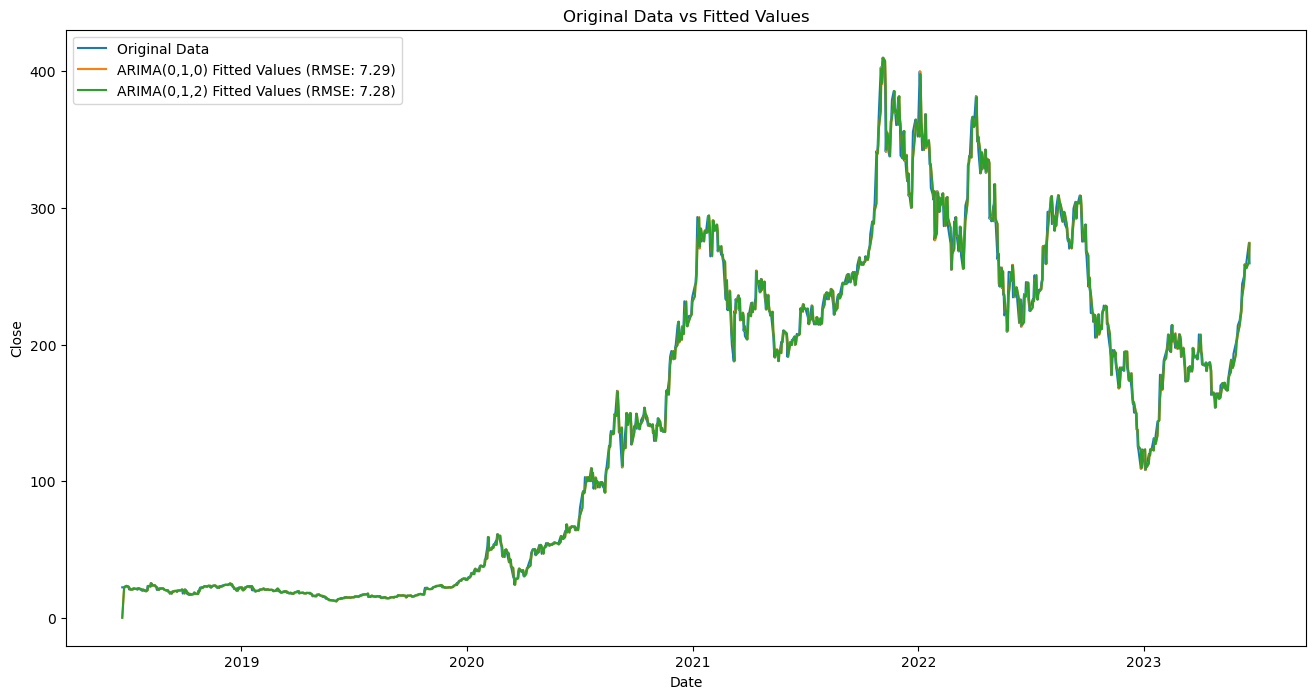

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.plot(TSLA_test, label="Original Data")
plt.plot(results_ARIMA.fittedvalues, label=f"ARIMA(0,1,0) Fitted Values (RMSE: {rmse_arima1:.2f})")
plt.plot(results_ARIMA2.fittedvalues, label=f"ARIMA(0,1,2) Fitted Values (RMSE: {rmse_arima2:.2f})")
plt.title("Original Data vs Fitted Values")
plt.xlabel("Date")
plt.ylabel("Close")
plt.legend()
plt.show()

In [31]:
# Calculate evaluation metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
mse = mean_squared_error(TSLA_test, predictions_ARIMA)
mae = mean_absolute_error(TSLA_test, predictions_ARIMA)
r2 = r2_score(TSLA_test, predictions_ARIMA)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R² Score: {r2}')

Mean Squared Error (MSE): 52.72301907786108
Mean Absolute Error (MAE): 4.327316649933185
R² Score: 0.9958966509783077
